In [1]:
import gmsh 

In [2]:
gmsh.initialize()

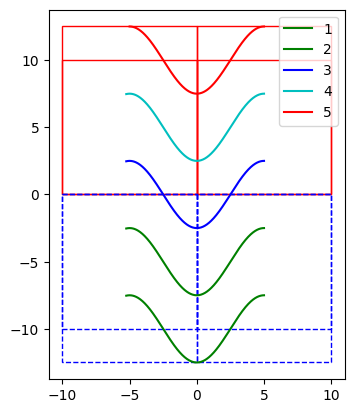

In [3]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)

lx = 10

rectangle(0,   0,  lx,  10  , 'red')
rectangle(0,   0, -lx,  10  , 'red')
rectangle(0,   0,  lx, 12.5 , 'red')
rectangle(0,   0, -lx, 12.5 , 'red')



rectangle(0,   0,  lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 500)

# =============================================================================
def fparams(t,y0):
    y = 4.1*R*t - 2.1*R
    x = -R*np.cos(2*np.pi*y/T) + y0
    return y,x

# x1,y1 = fparams(t1,-4*R)

# y1 = t1*2*R + R
# x1 = -R*np.cos(2*np.pi*y1/T) - 4*R

# plt.plot(x1,y1, 'r',label="1")

x1,y1 = fparams(t1,-4*R)
plt.plot(x1,y1, 'g',label="1")  

x2,y2 = fparams(t1,-2*R)
plt.plot(x2,y2, 'g',label="2")  

x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")

x4,y4 = fparams(t1,2*R)
plt.plot(x4,y4, 'c',label="4")


x5 = 4*R*t1 - 2*R
y5 = -R*np.cos(2*np.pi*x5/T) + 4*R
# x5,y5 = fparams(t1,4*R)
plt.plot(x5,y5, 'r',label="5")


# y5 = t1*R 
# x5 = -R*np.cos(2*np.pi*y5/T) + 4*R
# plt.plot(x5,y5, 'y' ,label="5")

# y6 = t1*2*R + 3*R
# x6 = -R*np.cos(2*np.pi*y6/T) + 4*R
# plt.plot(x6,y6, 'm' ,label="6")


# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [4]:
from gmshtools.CircRect6 import CircRect


In [5]:
import gmsh 

gmsh.initialize()

gmsh.model.add("t1")

# cilindro
Ly = 25
Lx = 60
tn  = 3.0
tl = 0.5
r  = 0.32

A = np.pi*r**2

factor = 2.2
rx = factor*r 
ry = (1/factor)*r

R = 10/6
nx_fibres = 6

lx = 10

z0 = tn/2
dx = 0.1 
dz = 0.1

hx = R
hz = tl
Lz = 2*(3*hz + z0) 

def CreateCylinder_Lxx(x0,z0):

    ellipse_1 = CircRect(x0, -Ly/2, z0, 
                         rx, ry, 
                         [0,1,0] ,            # vec_z 
                         [1,0,0])             # vec_x
    
    ellipse_2 = CircRect(x0, +Ly/2, z0,
                            rx, ry, 
                            [0,1,0] ,            # vec_z 
                            [1,0,0])             # vec_x
    gmsh.model.occ.synchronize()

    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

def CreateCylinder_Lyy(y0,z0):
    
    ellipse_1 = CircRect(-lx/2, y0, z0,
                            rx, ry, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    ellipse_2 = CircRect(lx/2, y0, z0,
                            rx, ry, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    gmsh.model.occ.synchronize()



    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

FM1_list = []


In [6]:

trajs_mid = [ [x1,y1],
              [x2,y2],
              [x3,y3],
              [x4,y4],
              [x5,y5]]

In [7]:


def createpipe(x1,y1,z1,xAxis,rx,ry):

    zAxis = np.array([x1[1]-x1[0],y1[1]-y1[0],0])
    zAxis = zAxis/np.linalg.norm(zAxis)
    
    x1_reduce = x1[::int(len(x1)/20)]
    y1_reduce = y1[::int(len(y1)/20)]
    z1_reduce = z1[::int(len(z1)/20)]
    # end 
    x1_reduce = np.concatenate((x1_reduce,x1[-1:]))
    y1_reduce = np.concatenate((y1_reduce,y1[-1:]))
    z1_reduce = np.concatenate((z1_reduce,z1[-1:]))

    # create points 
    points = []
    for i in range(len(x1_reduce)):
        points.append(gmsh.model.occ.addPoint(x1_reduce[i],
                                              y1_reduce[i],
                                              z1_reduce[i]))

    x = x1_reduce[0]
    y = y1_reduce[0]
    z = z1_reduce[0]

    disk = CircRect(x, y, z,
                    rx, ry,
                    zAxis,
                    xAxis)


    spline = gmsh.model.occ.addSpline(points)
    gmsh.model.occ.synchronize()
    wire = gmsh.model.occ.addWire([spline])
    gmsh.model.occ.synchronize()

    ss = gmsh.model.occ.addPlaneSurface([disk])
    gmsh.model.occ.synchronize()

    # pipe 
    pipe = gmsh.model.occ.addPipe([(2,ss)], wire)
    gmsh.model.occ.synchronize()

    return pipe

In [8]:
# gmsh.fltk.run()

In [9]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ [x1,y1],
              [x2,y2],
              [x3,y3],
              [x4,y4],
              [x5,y5]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 5*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    # yarn = CreateYarnRect({"trajs":trajs, 
    #                 "radius":0.3, 
    #                 "factor_radius":2.2, 
    #                 "density":1.5,
    #                 "skip_left":2,
    #                 "skip_right":2,
    #                 "vec_init":[1,0,0],
    #                 "vec_end":[1,0,0]})
    
    xl = trajs[:,0]
    yl = trajs[:,1]
    zl = trajs[:,2]
    yarn = createpipe(xl,yl,zl,
                      [1,0,0],
                      rx,ry)

    FM1_list.append(yarn[0][1])
    print("yarn", yarn[0][1])
    # gmsh.fltk.run()



yarn 1
yarn 2
yarn 3
yarn 4
yarn 5


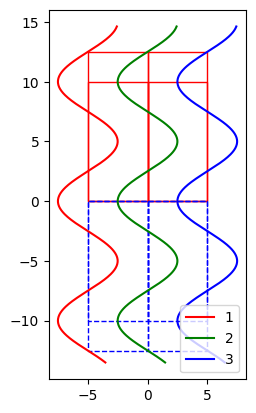

In [10]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)


rectangle(0,   0,  lx/2,  10  , 'red')
rectangle(0,   0, -lx/2,  10  , 'red')
rectangle(0,   0,  lx/2, 12.5 , 'red')
rectangle(0,   0, -lx/2, 12.5 , 'red')



rectangle(0,   0,  lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx/2, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx/2, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 500)

# =============================================================================
def fparams(t,y0):
    y = 2.25*12.5*t-13.5
    x = -R*np.cos(2*np.pi*y/T) + y0
    return x,y


x1,y1 = fparams(t1,-2*R)
plt.plot(x1,y1, 'r',label="1")

x2,y2 = fparams(t1,0)
plt.plot(x2,y2, 'g',label="2")

x3,y3 = fparams(t1,2*R)
plt.plot(x3,y3, 'b',label="3")
# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [11]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ [x1,y1],
              [x3,y3],
              [x5,y5]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 3*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    # yarn = CreateYarnRect({"trajs":trajs, 
    #                 "radius":0.3, 
    #                 "factor_radius":2.2, 
    #                 "density":1.5,
    #                 "skip_left":2,
    #                 "skip_right":2,
    #                 "vec_init":[1,0,0],
    #                 "vec_end":[1,0,0]})
    
    xl = trajs[:,0]
    yl = trajs[:,1]
    zl = trajs[:,2]
    yarn = createpipe(xl,yl,zl,
                      [1,0,0],
                      rx,ry)

    FM1_list.append(yarn[0][1])
    print("yarn", yarn[0][1])
    # gmsh.fltk.run()



yarn 6
yarn 7
yarn 8


In [12]:
# gmsh.fltk.run()

In [13]:

gmsh.model.occ.synchronize()
# 
#

nfilaments = int(0.5*25*6/10)

yspan = np.arange(-Ly/2, Ly/2, hx)
yspan = yspan + hx/2

FM2_list = []
for iy in yspan:
    FibreMinus_02 = CreateCylinder_Lyy(iy, -z0 - hz/2 )

    FM2_list.append(FibreMinus_02)

FM2_list.extend(FM1_list)


In [14]:

# Identificamos las fibras
fibres_tags = np.concatenate([FM1_list, FM2_list])
f1 = gmsh.model.addPhysicalGroup(3, fibres_tags)
gmsh.model.setPhysicalName(3, f1, "Fibres")


gmsh.model.occ.synchronize()
box_01 = gmsh.model.occ.addBox( -Lx/2  , -Ly/2 , + z0 ,
                                Lx   ,  Ly   ,  3*hz    )

box_02 = gmsh.model.occ.addBox( -lx/2  , -Ly/2 , - z0 ,
                                lx   ,  Ly   ,  -3*hz    )

gmsh.model.occ.synchronize()


box_02_cut = gmsh.model.occ.fragment([(3, box_02)], 
                   [(3,i) for i in FM2_list],
                   )

gmsh.model.occ.synchronize()

In [15]:
gmsh.fltk.run()